# Olacademy Artificial Neural Network Task:

Task B:

1) Predict the loss amount for the insurance policies using the historical trends and features.

2) Drive information by analyzing the data set you have made and present valuable information from it in a presentable format.


@author:--Ravi Gupta

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating Sample Dataset 

Here we are creating sample dataset which is taken from gaussian normal distribution of different variances and means.

n_samples = n

features = 15

In [54]:
arr_list = []
n=1000
for i in range(15):
    variance = np.random.randn()
    mean = np.random.randn()
    arr = (variance*np.random.randn(1,n)+mean)[0]
    arr_list.append(arr)

In [56]:
df = pd.DataFrame(arr_list)
df = df.T
df['loss'] = pd.DataFrame(np.random.randn(n,1))  #--one extra columns added which is loss value 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,loss
0,-0.069485,1.737556,0.077410,2.152212,0.374145,1.793175,-1.775465,-1.020636,0.352300,0.357835,0.496288,1.949755,-1.444216,0.519977,-0.329759,-0.986858
1,1.605451,0.998635,0.260032,-0.181370,1.165238,1.986263,-1.582049,-0.855719,0.374953,-0.213422,0.734451,2.086388,-0.614130,1.426938,-0.552127,-0.677337
2,3.946725,-0.425807,0.533190,-1.017670,-0.935541,1.960569,-1.668485,-0.973436,0.319971,0.205916,0.617277,1.673378,-0.034557,0.409794,-0.405389,-0.882761
3,-1.418308,0.729696,0.368461,1.197281,-2.857662,1.893314,-1.756116,-0.242178,0.351291,0.008017,0.560577,1.970210,-0.951393,-0.160577,-0.324366,-0.584880
4,2.315070,2.510819,0.549828,0.515016,-3.370638,1.836128,-1.331360,-2.596073,0.360427,-0.142508,0.697170,2.049097,0.274121,0.678938,-0.163766,0.071741


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E02E10A90>,
      dtype=object)

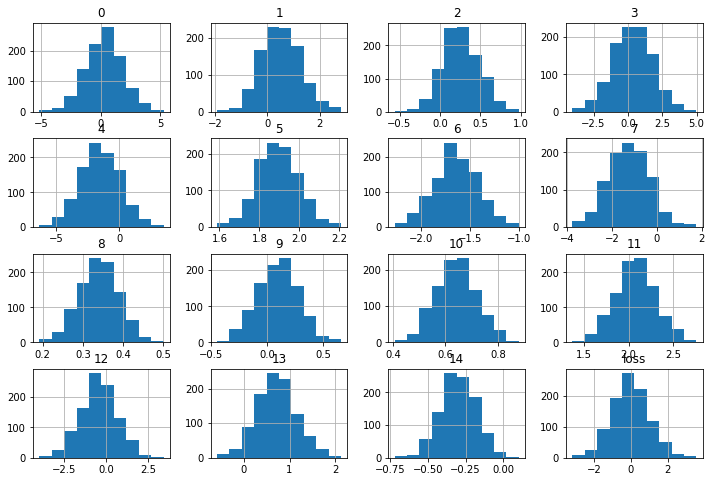

In [57]:
df.hist(figsize=(12,8))

In [58]:
Data = df.iloc[:, :-1]
Target = df.iloc[:,-1]

In [59]:
Data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.312177,0.521297,0.260401,0.317054,-1.489807,1.893527,-1.641705,-1.254238,0.340233,0.095062,0.640184,2.077668,-0.431703,0.720616,-0.297031
std,1.571134,0.748270,0.228090,1.459076,1.574828,0.101970,0.226234,0.906607,0.049279,0.181685,0.078619,0.227655,1.090837,0.436492,0.118576
min,-5.156239,-1.924955,-0.561000,-4.053245,-6.313640,1.587379,-2.273290,-3.774594,0.191442,-0.444463,0.406273,1.370441,-3.946842,-0.580264,-0.718928
25%,-0.711682,-0.012795,0.103174,-0.688845,-2.578303,1.819623,-1.789566,-1.867709,0.306888,-0.035288,0.586548,1.929754,-1.124084,0.432206,-0.376269
50%,0.332234,0.492445,0.243582,0.319346,-1.560507,1.892804,-1.645912,-1.263291,0.340849,0.097510,0.640386,2.077309,-0.455624,0.711181,-0.298412
75%,1.369909,1.043369,0.415528,1.308423,-0.387945,1.961897,-1.482476,-0.635140,0.373580,0.219592,0.691889,2.232696,0.305009,0.997588,-0.215572
max,5.279131,2.820843,0.977644,4.993876,3.524341,2.208702,-0.997198,1.762280,0.501020,0.657255,0.879399,2.760397,3.387626,2.123544,0.102144


In [60]:
Data.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000000,0.009486,0.072359,0.027848,0.045609,0.010493,-0.027044,0.002938,-0.017660,-0.005235,0.014705,-0.060490,-0.001558,-0.061925,0.061087
1,0.009486,1.000000,-0.018155,0.021117,0.017383,0.042607,0.018169,0.032776,0.069152,-0.060094,-0.004022,0.014840,-0.011048,-0.036348,-0.051176
2,0.072359,-0.018155,1.000000,0.075871,0.074709,0.018540,0.003423,0.043618,0.006006,-0.015005,0.032456,0.006127,0.018311,0.011718,-0.026850
3,0.027848,0.021117,0.075871,1.000000,0.021634,0.022270,0.017350,0.005914,-0.021986,0.016568,0.017365,-0.020275,-0.036636,0.003671,-0.031114
4,0.045609,0.017383,0.074709,0.021634,1.000000,-0.027996,-0.005836,-0.002066,-0.022192,-0.002525,0.029841,-0.063209,0.001187,0.005021,0.007242
5,0.010493,0.042607,0.018540,0.022270,-0.027996,1.000000,0.035171,0.013492,0.004120,-0.000334,0.035514,0.007439,-0.000379,0.001900,-0.060032
6,-0.027044,0.018169,0.003423,0.017350,-0.005836,0.035171,1.000000,0.000965,0.016633,0.023292,-0.012570,-0.007260,0.022733,-0.021961,-0.025719
7,0.002938,0.032776,0.043618,0.005914,-0.002066,0.013492,0.000965,1.000000,-0.036822,-0.014273,-0.012127,0.034469,0.014243,-0.000315,0.005103
8,-0.017660,0.069152,0.006006,-0.021986,-0.022192,0.004120,0.016633,-0.036822,1.000000,0.021399,0.016977,-0.028972,-0.044876,-0.016471,-0.015587
9,-0.005235,-0.060094,-0.015005,0.016568,-0.002525,-0.000334,0.023292,-0.014273,0.021399,1.000000,-0.014219,0.005298,0.063515,0.025654,-0.030953


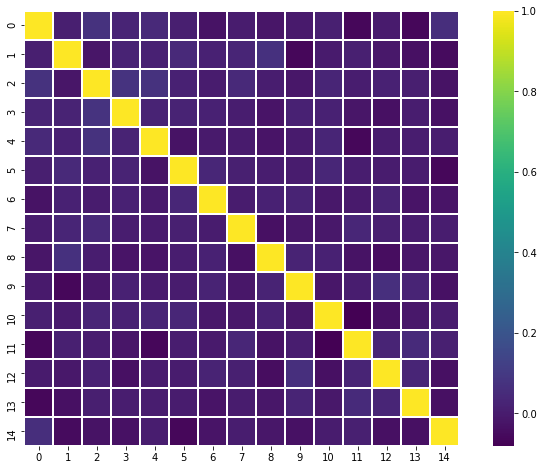

In [61]:
#Looking at a correlation among all numeric variables
matrix = Data.corr()
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(matrix,square=True, cmap="viridis",linewidth=0.5);

# Splitting the Data into training and testing Dataset

In [62]:
from sklearn.model_selection  import  train_test_split
train_x,test_x,train_y,test_y = train_test_split(Data,Target,test_size=0.8)

# Making Model

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Prediction 

In [64]:
pred_value = model.predict(test_x) #--predicting value for test_x dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0385E3C8>]],
      dtype=object)

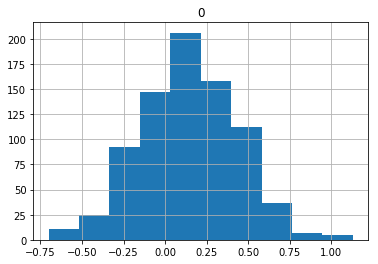

In [65]:
pred_value = pd.DataFrame(pred_value)
pred_value.hist()

# Actual Value

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E0385E7B8>]],
      dtype=object)

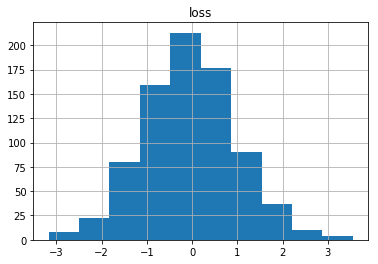

In [66]:
actual_value =pd.DataFrame(test_y)
actual_value.hist()